In [40]:
# import all the necessary packages
import numpy as np
import pandas as pd

# Packages / libraries
import os #provides functions for interacting with the operating system
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

%matplotlib inline


In [31]:
df = pd.read_csv('ais.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rcc     202 non-null    float64
 1   wcc     202 non-null    float64
 2   hc      202 non-null    float64
 3   hg      202 non-null    float64
 4   ferr    202 non-null    int64  
 5   bmi     202 non-null    float64
 6   ssf     202 non-null    float64
 7   pcBfat  202 non-null    float64
 8   lbm     202 non-null    float64
 9   ht      202 non-null    float64
 10  wt      202 non-null    float64
 11  sex     202 non-null    object 
 12  sport   202 non-null    object 
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [23]:
df.head()

rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm     ht    wt sex  \
0  3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32  195.9  78.9   f   
1  4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55  189.7  74.4   f   
2  4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36  177.8  69.1   f   
3  4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18  185.0  74.9   f   
4  4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20  184.6  64.6   f   

    sport  
0  B_Ball  
1  B_Ball  
2  B_Ball  
3  B_Ball  
4  B_Ball

In [24]:
df.isnull().sum()

rcc       0
wcc       0
hc        0
hg        0
ferr      0
bmi       0
ssf       0
pcBfat    0
lbm       0
ht        0
wt        0
sex       0
sport     0
dtype: int64

In [38]:
df = pd.get_dummies(df, columns=['sport'], drop_first=True)

df

rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm     ht  ...  \
0    3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32  195.9  ...   
1    4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55  189.7  ...   
2    4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36  177.8  ...   
3    4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18  185.0  ...   
4    4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20  184.6  ...   
..    ...  ...   ...   ...   ...    ...    ...     ...    ...    ...  ...   
197  4.90  7.6  45.6  16.0    90  27.56   67.2   11.79  82.00  183.9  ...   
198  5.66  8.3  50.2  17.7    38  23.76   56.5   10.05  72.00  183.5  ...   
199  5.03  6.4  42.7  14.3   122  22.01   47.6    8.51  68.00  183.1  ...   
200  4.97  8.8  43.0  14.9   233  22.34   60.4   11.50  63.00  178.4  ...   
201  5.38  6.3  46.0  15.7    32  21.07   34.9    6.26  72.00  190.8  ...   

     sex sport_Field  sport_Gym  sport_Netball  sport_Row  sport_Swim  \
0      f           0          0              0          0           0   
1      f           0          0              0          0           0   
2      f           0          0              0          0           0   
3      f           0          0              0          0           0   
4      f           0          0              0          0           0   
..   ...         ...        ...            ...        ...         ...   
197    m           0          0              0          0           0   
198    m           0          0              0          0           0   
199    m           0          0              0          0           0   
200    m           0          0              0          0           0   
201    m           0          0              0          0           0   

     sport_T_400m  sport_T_Sprnt  sport_Tennis  sport_W_Polo  
0               0              0             0             0  
1               0              0             0             0  
2               0              0             0             0  
3               0              0             0             0  
4               0              0             0             0  
..            ...            ...           ...           ...  
197             0              0             0             1  
198             0              0             1             0  
199             0              0             1             0  
200             0              0             1             0  
201             0              0             1             0  

[202 rows x 21 columns]

/Users/hamdihassan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

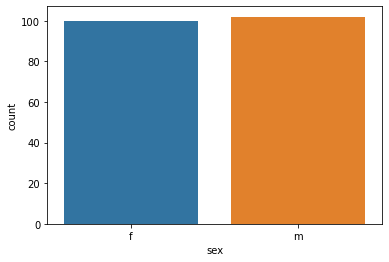

In [41]:
sns.countplot(df['sex'])

In [51]:

target_col = 'sex'
feature_cols = [c for c in df.columns if c != target_col]

X = df[feature_cols]
y = df[target_col]

X_test, X_train, y_test, y_train = train_test_split(X,y, random_state =1)

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)



/Users/hamdihassan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
y_pred = logreg_model.predict(X_test)
y_pred_prop = logreg_model.predict_proba(X_test)

In [55]:
from sklearn.metrics import confusion_matrix

con_mat =  confusion_matrix(y_test, y_pred, labels = ['m','f'])

In [57]:
confusion = pd.DataFrame(con_mat, index= ['Predicted_male', 'Predicted_female'],
                                          columns= ['is_male', 'is_female'])

confusion

is_male  is_female
Predicted_male         78          3
Predicted_female        2         68

In [66]:
from sklearn import metrics

print('Model accuracy is:', metrics.accuracy_score(y_test, y_pred))

Model accuracy is: 0.9668874172185431


In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           f       0.96      0.97      0.96        70
           m       0.97      0.96      0.97        81

    accuracy                           0.97       151
   macro avg       0.97      0.97      0.97       151
weighted avg       0.97      0.97      0.97       151

